In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
os.chdir('../Documents')
os.getcwd()

'/Users/smarino/Documents'

In [5]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
#remove duplicates
df.info()
#useless reviews.id, reviews.didPurchase, reviews.sourceURLs, sourceURL
#usefull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
#Remove Duplicates

In [75]:


#unique count of categories - for Tableau
print('number of unique products: ' + str(len(df['name'].unique())))
print('number of unique categories: ' + str(len(df['primaryCategories'].unique())))
print('number of unique users: ' + str(len(df['reviews.username'].unique())))

#Top Rated Category rename brand - basic capitalise

number of unique products: 65
number of unique categories: 9
number of unique users: 16269


In [74]:
#Number of reviews per product & Average Review & Min & Max

data = df[['id','name','reviews.rating','brand','primaryCategories']].groupby(['id','name','brand','primaryCategories'], as_index=False).agg({'id':'count','reviews.rating':['mean','min','max']}).reset_index(drop=True)
data.columns = ['name','brand','categories','no. of ratings','ave rating','min rating','max rating']
data.sort_values('no. of ratings', ascending=False, ignore_index=True, inplace=True)
data.head()

,name,brand,categories,no. of ratings,ave rating,min rating,max rating
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,Health & Beauty,8343,4.448040,1,5
1,AmazonBasics AA Performance Alkaline Batteries...,Amazonbasics,Health & Beauty,3728,4.453594,1,5
2,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",Amazon,Electronics,2443,4.597217,1,5
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,Electronics,2370,4.584388,1,5
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Toys & Games,Electronics",1676,4.531026,1,5


In [23]:
#Most Rated Product
data['name'][0]

#bubble chart

'AmazonBasics AAA Performance Alkaline Batteries (36 Count)'

(0.0, 6.0)

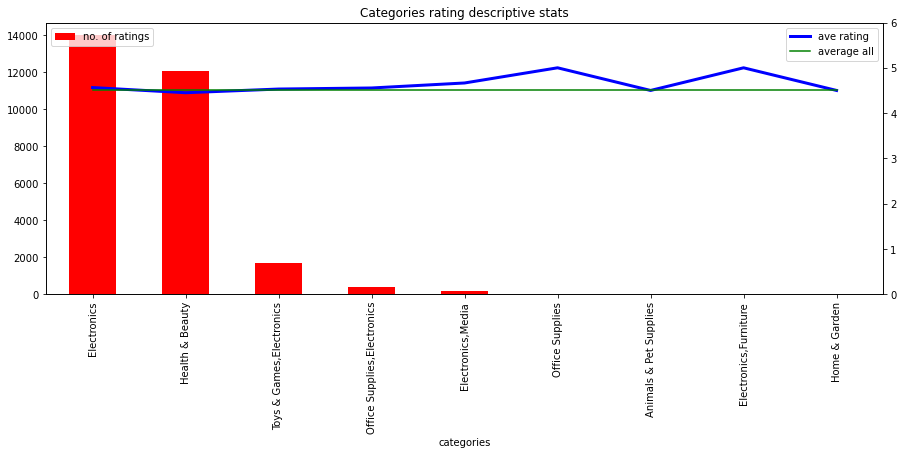

In [136]:

df1 = df[['id','reviews.rating','primaryCategories']].groupby(['primaryCategories'], as_index=False).agg({'id':'count','reviews.rating':['mean','min','max']}).reset_index(drop=True)
df1.columns = ['categories','no. of ratings','ave rating','min rating','max rating']
df1.set_index('categories',inplace=True)
df1['average all'] = df['reviews.rating'].mean()
df1.sort_values('no. of ratings', ascending=False, inplace=True)


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df1['no. of ratings'].plot(kind='bar', color='r', position=0.5, ax=ax, grid=False)
df1['ave rating'].plot(kind='line', color='b', ax=ax2, grid=False, linewidth=3)
df1['average all'].plot(kind='line', color='g', ax=ax2, grid=False)

ax.legend(loc=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Categories rating descriptive stats')
plt.autoscale()

ax.legend(loc=2)
ax2.legend(loc=1)


ax2.set_ylim(0,6)

(0.0, 6.0)

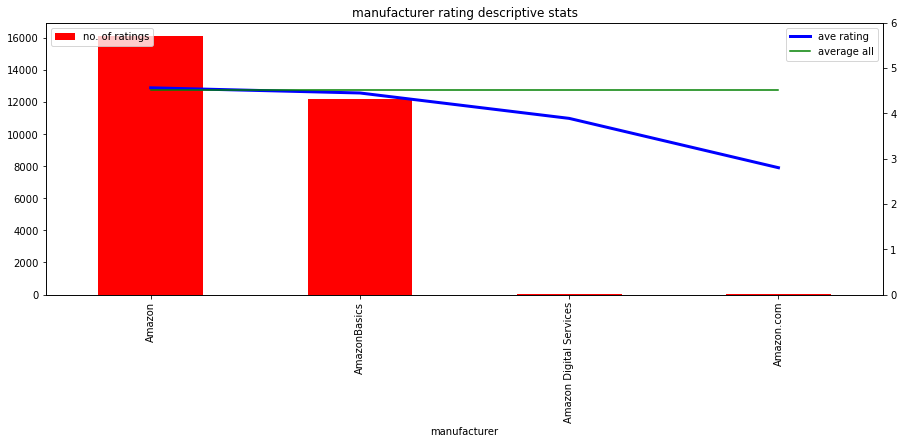

In [137]:


df1 = df[['id','reviews.rating','manufacturer']].groupby(['manufacturer'], as_index=False).agg({'id':'count','reviews.rating':['mean','min','max']}).reset_index(drop=True)
df1.columns = ['manufacturer','no. of ratings','ave rating','min rating','max rating']
df1.set_index('manufacturer',inplace=True)
df1['average all'] = df['reviews.rating'].mean()
df1.sort_values('no. of ratings', ascending=False, inplace=True)


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df1['no. of ratings'].plot(kind='bar', color='r', position=0.5, ax=ax, grid=False)
df1['ave rating'].plot(kind='line', color='b', ax=ax2, grid=False, linewidth=3)
df1['average all'].plot(kind='line', color='g', ax=ax2, grid=False)

ax.legend(loc=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('manufacturer rating descriptive stats')
plt.autoscale()

ax.legend(loc=2)
ax2.legend(loc=1)


ax2.set_ylim(0,6)

  reviews.rating            primaryCategories  no. of ratings
0              1                  Electronics             187
1              1            Electronics,Media               2
2              1              Health & Beauty             751
3              1  Office Supplies,Electronics               2
4              1     Toys & Games,Electronics              23


/Users/smarino/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


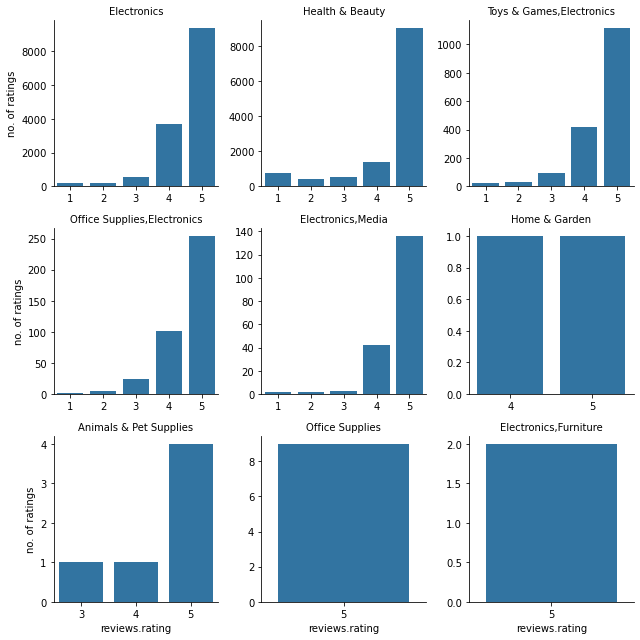

In [86]:
#Visualisations

df_grp = df[['id','reviews.rating','primaryCategories']].groupby(['reviews.rating','primaryCategories'], as_index=False).agg({'id':'count'})
df_grp.columns = ['reviews.rating','primaryCategories','no. of ratings']
df_grp['reviews.rating'] = df_grp['reviews.rating'].apply(lambda x: str(x))
print(df_grp.head())

#1. distribution of ratings per primary category
g = sns.FacetGrid(df_grp, col="primaryCategories", col_wrap=3, sharey=False, sharex=False, col_order=['Electronics','Health & Beauty','Toys & Games,Electronics','Office Supplies,Electronics','Electronics,Media','Home & Garden','Animals & Pet Supplies','Office Supplies','Electronics,Furniture'])
g.map(sns.barplot, 'reviews.rating','no. of ratings')
g.set_titles(col_template='{col_name}')

/Users/smarino/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


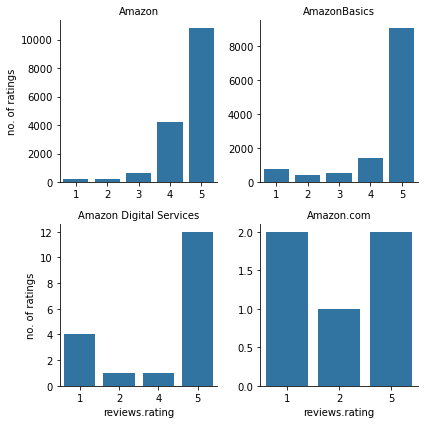

In [107]:
#Visualisations

df_grp = df[['id','reviews.rating','manufacturer']].groupby(['reviews.rating','manufacturer'], as_index=False).agg({'id':'count'})
df_grp.columns = ['reviews.rating','manufacturer','no. of ratings']
df_grp['reviews.rating'] = df_grp['reviews.rating'].apply(lambda x: str(x))


#1. distribution of ratings per primary category
g = sns.FacetGrid(df_grp, col="manufacturer", col_wrap=2, sharey=False, sharex=False, col_order=['Amazon','AmazonBasics','Amazon Digital Services','Amazon.com'])
g.map(sns.barplot, 'reviews.rating','no. of ratings')
g.set_titles(col_template='{col_name}')

In [88]:
#Correlation between Rating and Helpfulness

corr_data = df[['primaryCategories','reviews.rating','reviews.numHelpful']]
corr_data = corr_data.loc[~(corr_data['reviews.numHelpful'].isnull())]

#convert int to str
#corr_data['reviews.rating'] = corr_data['reviews.rating'].apply(lambda x: str(x))
corr_data.reset_index(drop=True, inplace=True)
corr_data.head()
#and by category
#No Price data

,primaryCategories,reviews.rating,reviews.numHelpful
0,Electronics,5,1.0
1,Electronics,4,0.0
2,Electronics,5,0.0
3,Electronics,5,1.0
4,Electronics,5,1.0


In [89]:
corr_df = corr_data.corr()
print(corr_df)

                    reviews.rating  reviews.numHelpful
reviews.rating            1.000000           -0.041006
reviews.numHelpful       -0.041006            1.000000


<AxesSubplot:>

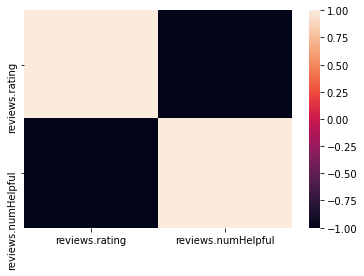

In [90]:
sns.heatmap(corr_df[['reviews.rating','reviews.numHelpful']].corr())

In [132]:
print(corr_data['primaryCategories'].unique())
print(len(corr_data['primaryCategories'].unique()))

['Electronics' 'Electronics,Furniture' 'Toys & Games,Electronics'
 'Electronics,Media' 'Office Supplies,Electronics']
5


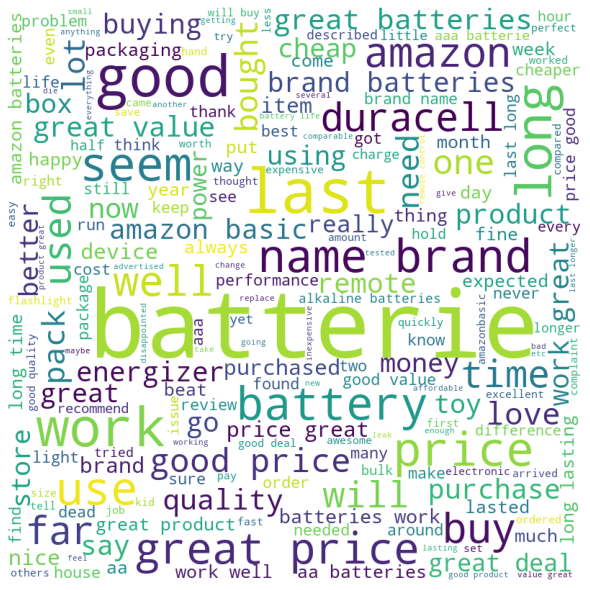

In [144]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  



def word_cloud_generator(product):
    
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    cloud_data = df[df['name'] == product]
    # iterate through the csv file
    for val in cloud_data['reviews.text']:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
  
    plt.show()

word_cloud_generator('AmazonBasics AAA Performance Alkaline Batteries (36 Count)')   